In [8]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Fixed_cleaned_activities.csv")

# Display basic info
print(df.info())

# Show the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Activity ID                            155 non-null    int64  
 1   Activity Type                          155 non-null    object 
 2   Begin Timestamp                        155 non-null    object 
 3   End Timestamp                          155 non-null    object 
 4   Max. Elevation (Raw)                   155 non-null    float64
 5   Min. Elevation (Raw)                   155 non-null    float64
 6   Elevation Gain (Raw)                   155 non-null    float64
 7   Elevation Loss (Raw)                   155 non-null    float64
 8   Average Heart Rate (bpm)               155 non-null    float64
 9   Min. Heart Rate (bpm)                  155 non-null    float64
 10  Average Moving Speed                   155 non-null    float64
 11  Averag

In [11]:
fatigue_features = ['Average Heart Rate (bpm)', 'Max. Heart Rate (bpm)', 'Calories', 'Duration (seconds)']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[fatigue_features])
df['fatigue_score'] = df_scaled.mean(axis=1)
df['fatigue_label'] = np.where(df['fatigue_score'] > 0, 1, 0)

In [12]:
numerical_features = [
    'Average Heart Rate (bpm)', 'Max. Heart Rate (bpm)', 'Calories', 'Duration (seconds)',
    'Average Speed', 'Max. Speed', 'Elevation Gain (Raw)', 'Elevation Loss (Raw)',
    'Temperature (Raw)', 'Humidity (Raw)', 'Wind Speed (Raw)', 'Average Cadence'
]

categorical_features = ['Activity Type', 'Condition', 'Rainfall', 'Wind Direction', 'Device']

In [14]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cats = encoder.fit_transform(df[categorical_features])
encoded_cat_cols = encoder.get_feature_names_out(categorical_features)


# --- Step 5: Combine features into final dataset ---
X = pd.concat([
    df[numerical_features].reset_index(drop=True),
    pd.DataFrame(encoded_cats, columns=encoded_cat_cols)
], axis=1)

y = df['fatigue_label']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        18
           1       0.90      0.69      0.78        13

    accuracy                           0.84        31
   macro avg       0.85      0.82      0.83        31
weighted avg       0.85      0.84      0.83        31



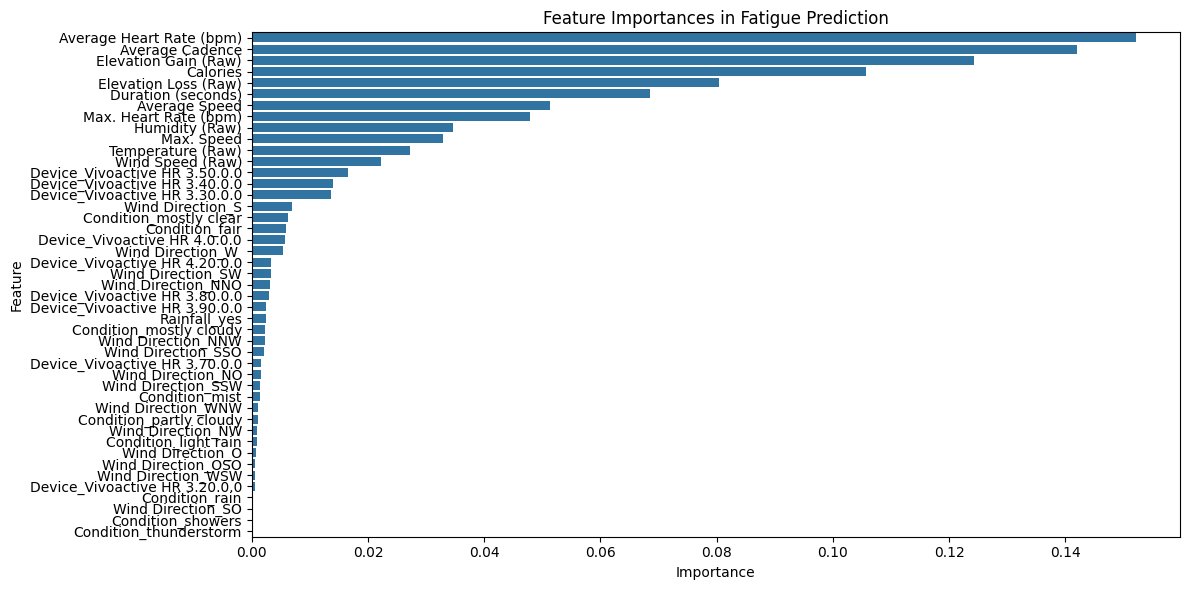

In [19]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features_sorted = X.columns[indices]
importance_sorted = importances[indices]

plt.figure(figsize=(12, 6))
sns.barplot(x=importance_sorted, y=features_sorted)
plt.title("Feature Importances in Fatigue Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

C:\Users\billt\AppData\Local\Temp\ipykernel_25656\1135247725.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


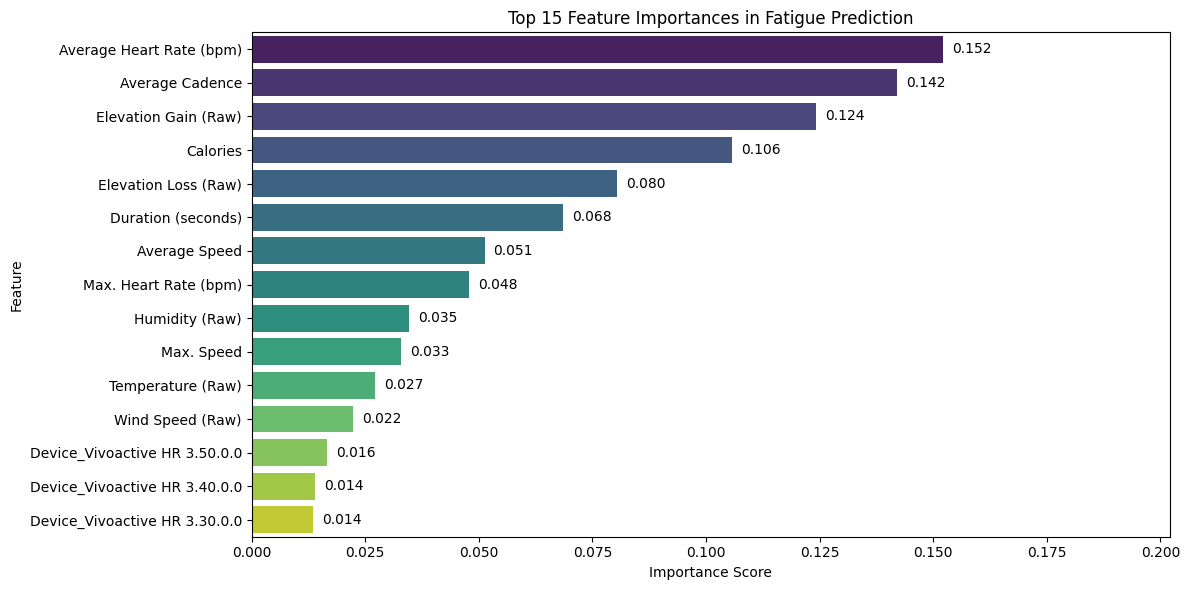

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort and select top 15 most important features
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by="Importance", ascending=False)

top_n = 15
top_features = feature_importance_df.head(top_n)

# Plot
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')

# Add value labels next to each bar
for i, (importance, feature) in enumerate(zip(top_features['Importance'], top_features['Feature'])):
    plt.text(importance + 0.002, i, f"{importance:.3f}", va='center', fontsize=10)

# Style the plot
plt.title("Top 15 Feature Importances in Fatigue Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.xlim(0, top_features['Importance'].max() + 0.05)  # Add some space for the labels
plt.tight_layout()
plt.show()
